# Churn Prediction - Credit Card

The dataset was collected from kaggle: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                             brier_score_loss, roc_curve, roc_auc_score, 
                             precision_recall_curve, auc, confusion_matrix, classification_report)

import optuna
import shap

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Utils
from src.modelling_utils import *
from src.eda_utils import *

/home/pabeckha/Documents/churn_prediction/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Dictionary

**1. CLIENTNUM:** Client number. Unique identifier for the customer holding the account. Categorical nominal.


**2. Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary.


**3. Customer_Age:** Demographic variable - Customer's Age in Years. Numerical discrete.


**4. Gender:** Demographic variable - M=Male, F=Female. Categorical nominal.


**5. Dependent_count:** Demographic variable - Number of dependents. Numerical discrete.


**6. Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.

**7. Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.

**8. Income_Category:** Demographic variable - Annual Income Category of the account holder (< 
40K - 60K, 
80K, 
120K, >.). Categorical ordinal.

**9. Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.

**10. Months_on_book:** Period of relationship with bank. Numerical discrete.

**11. Total_Relationship_Count:** Total no. of products held by the customer. Numerical discrete.

**12. Months_Inactive_12_mon:** No. of months inactive in the last 12 months. Numerical discrete.

**13. Contacts_Count_12_mon:** No. of Contacts in the last 12 months. Numerical discrete.

**14. Credit_Limit:** Credit Limit on the Credit Card. Numerical continuous.

**15. Total_Revolving_Bal:** Total Revolving Balance on the Credit Card. Numerical discrete.

**16. Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months). Numerical continuous.

**17. Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1). Numerical continuous.

**18. Total_Trans_Amt:** Total Transaction Amount (Last 12 months). Numerical discrete.

**19. Total_Trans_Ct:** Total Transaction Count (Last 12 months). Numerical discrete.

**20. Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1). Numerical continuous.

**21. Avg_Utilization_Ratio:** Average Card Utilization Ratio. Numerical continuous.

# EDA

In [2]:
data_path = '../input/BankChurners.csv'
df = pd.read_csv(data_path)
df = df.iloc[:, :-2]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 10127 rows and 21 columns.


In [6]:
# Set display precision
pd.set_option('display.precision', 2)

# Disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


**Some Insights:**

1. The average age is approximately 46 years. 
   
    Interquartile Range (IQR)

    IQR = Q3 - Q1 = 52 - 41 = 11
    50% of ages range from 41 to 52

    Indicating an old profile


   
2. On average, customers made 65 transactions in the last 12 months. So, made about 5.4 transactions/month.

3. On average the clients has almost 4 products of the Bank.

In [7]:
df.duplicated().sum()

0

There are no missing or duplicated values.

In [8]:
df.drop(columns=['CLIENTNUM'], inplace=True)
df.columns = [x.lower() for x in df.columns]
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['attrition_flag'] = df['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)

Slitting the data into train and test sets

In [9]:
X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modeling

## Read the Dataset

In [2]:
data_path = '../input/BankChurners.csv'
df = pd.read_csv(data_path)
df = df.iloc[:, :-2]

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
# renaming the columns
df.columns = [x.lower() for x in df.columns]

df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)
df['churn_flag'] = df['churn_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

## Split the data into train and test sets

A good practice to protect the model against data leakage is perform **fit_transform or training** data and just **transform in the test** data

In [5]:
X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (8101, 20).
Train target dataset shape: (8101,).
Test predictor dataset shape: (2026, 20).
Test target dataset shape: (2026,).


In [6]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
churn_flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64

Test target proportion: 
churn_flag
0    0.839585
1    0.160415
Name: proportion, dtype: float64


# Feature Engineering

## Tree Models

In [7]:
X_train.head()

,clientnum,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2856,787504158,36,F,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570.0,2230,340.0,0.686,1755,42,0.448,0.868
6515,718279008,44,M,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000
7141,771338658,46,M,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078
632,714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510
3496,717582558,50,M,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034


In [8]:
numerical_features = X_train.select_dtypes('number').columns.to_list()
print(f'There are {len(numerical_features)} numerical features.')
print('They are:')
print(numerical_features)

There are 15 numerical features.
They are:
['clientnum', 'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']


In [9]:
categorical_features = X_train.select_dtypes('object').columns.to_list()
print(f'There are {len(categorical_features)} categorical features.')
print('They are: ')
print(categorical_features)

There are 5 categorical features.
They are: 
['gender', 'education_level', 'marital_status', 'income_category', 'card_category']


In [10]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {X_train[feature].nunique()} unique values. They are: ')
    print(X_train[feature].value_counts(normalize=True))
    print()

gender
----------------------------------------
There are 2 unique values. They are: 
gender
F    0.527342
M    0.472658
Name: proportion, dtype: float64

education_level
----------------------------------------
There are 7 unique values. They are: 
education_level
Graduate         0.306382
High School      0.203679
Unknown          0.148994
Uneducated       0.146031
College          0.098259
Post-Graduate    0.052710
Doctorate        0.043945
Name: proportion, dtype: float64

marital_status
----------------------------------------
There are 4 unique values. They are: 
marital_status
Married     0.463523
Single      0.387853
Unknown     0.074682
Divorced    0.073941
Name: proportion, dtype: float64

income_category
----------------------------------------
There are 6 unique values. They are: 
income_category
Less than $40K    0.349586
$40K - $60K       0.178990
$80K - $120K      0.149241
$60K - $80K       0.140230
Unknown           0.109369
$120K +           0.072584
Name: proportion, 

In [11]:
# Construct the preprocessor for linear models.
one_hot_encoding_features = ['gender', 
                             'education_level', 
                             'marital_status', 
                             'income_category', 
                             'card_category']

In [12]:
std_scaling_features = ['customer_age', 
                        'dependent_count', 
                        'months_on_book', 
                        'total_relationship_count', 
                        'months_inactive_12_mon', 
                        'contacts_count_12_mon', 
                        'credit_limit', 
                        'total_revolving_bal', 
                        'avg_open_to_buy', 
                        'total_amt_chng_q4_q1', 
                        'total_trans_amt', 
                        'total_trans_ct', 
                        'total_ct_chng_q4_q1',
                        'products_per_dependent',
                        'trans_amt_per_dependent',
                        'products_per_dependent',
                        'trans_amt_per_dependent',
                        'trans_ct_per_dependent',
                        'trans_amt_per_products',
                        'trans_ct_per_products',
                        'avg_trans_amt',
                        'credit_util_rate',
                        'proportion_inactive_months',
                        'products_per_tenure',
                        'products_per_contacts',
                        'dependents_per_contacts',
                        'trans_ct_per_contacts',
                        'products_per_inactivity',
                        'dependents_per_inactivity',
                        'trans_ct_per_inactivity',
                        'trans_amt_per_credit_limit',
                        'age_per_tenure',
                        'trans_ct_per_tenure',
                        'trans_amt_per_tenure',
                        'total_spending',
                        'inactivity_contacts',
                        'education_income_levels']

to_drop_features = ['clientnum',
                    'avg_open_to_buy']

In [13]:
linear_preprocessor = Pipeline(
    steps=[
        ('feature_engineer', FeatureEngineer()),
        ('one_hot_encoder', OneHotFeatureEncoder(to_encode=one_hot_encoding_features)),
        ('std_scaler', StandardFeatureScaler(to_scale=std_scaling_features)),
        ('col_dropper', ColumnDropper(to_drop=to_drop_features))
    ]
)

In [14]:
X_train_prepared_linear = linear_preprocessor.fit_transform(X_train)
X_train_prepared_linear.shape

(8101, 55)

In [15]:
X_train_prepared_linear.head()

,avg_utilization_ratio,gender_M,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Married,marital_status_Single,...,products_per_inactivity,dependents_per_inactivity,trans_ct_per_inactivity,trans_amt_per_credit_limit,age_per_tenure,trans_ct_per_tenure,trans_amt_per_tenure,total_spending,inactivity_contacts,education_income_levels
0,0.868,0,0,0,0,0,0,1,1,0,...,-0.485952,-1.237821,-0.880000,-0.381331,0.816497,-0.178604,-0.494497,-0.442467,0.129437,-1.477093
1,0.000,1,0,0,1,0,0,0,0,1,...,0.365249,0.264667,-0.663276,-1.013049,-0.443162,-0.943028,-0.578903,-0.922191,0.129437,0.026353
2,0.078,1,0,0,1,0,0,0,1,0,...,0.000449,-0.570049,-0.200931,-0.718602,0.967656,1.160665,0.107518,-0.102463,-0.526738,0.527502
3,0.510,0,0,1,0,0,0,0,1,0,...,0.730050,0.765496,0.290311,-0.545573,0.816497,-0.224470,-0.531703,-0.650920,-0.526738,0.026353
4,0.034,1,0,1,0,0,0,0,0,1,...,0.000449,-0.736992,0.073587,-0.989645,-0.317196,-0.123566,-0.288816,-0.139928,0.129437,2.030949


In [16]:
# Construct the preprocessor for tree-based models.
one_hot_encoding_features = ['gender']

In [17]:
# I will encode 'unknown' as the last one, due to its churn rate (among the first or second highest one).
ordinal_encoding_orders = {
    'education_level': ['Uneducated',
                        'High School',
                        'College',
                        'Graduate',
                        'Post-Graduate',
                        'Doctorate',
                        'Unknown'],
    'income_category': ['Less than $40K',
                        '$40K - $60K',
                        '$60K - $80K',
                        '$80K - $120K',
                        '$120K +',
                        'Unknown'],
    'card_category': ['Blue',
                      'Silver',
                      'Gold',
                      'Platinum']
}

target_encoding_features = ['marital_status']

to_drop_features = ['clientnum',
                    'avg_open_to_buy']


In [18]:
tree_preprocessor = Pipeline(
    steps=[
        ('feature_engineer', FeatureEngineer()),
        ('one_hot_encoder', OneHotFeatureEncoder(to_encode=one_hot_encoding_features)),
        ('ordinal_encoder', OrdinalFeatureEncoder(to_encode=ordinal_encoding_orders)),
        ('target_encoder', TargetFeatureEncoder(to_encode=target_encoding_features)),
        ('col_dropper', ColumnDropper(to_drop=to_drop_features))
    ]
)

X_train_prepared_tree = tree_preprocessor.fit_transform(X_train, y_train)
X_train_prepared_tree.shape

(8101, 40)

In [19]:
X_train_prepared_tree.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,...,trans_ct_per_tenure,trans_amt_per_tenure,total_spending,inactivity_contacts,education_income_levels,gender_M,education_level,income_category,card_category,marital_status
0,36,0,24,4,3,2,2570.0,2230.0,0.686,1755.0,...,1.750000,73.125000,3985,5,0,0,6,0,0,0.153397
1,44,3,36,5,2,3,25276.0,0.0,0.849,2282.0,...,1.055556,63.388889,2282,5,3,1,1,2,1,0.168998
2,46,2,30,6,3,1,11670.0,915.0,0.892,4277.0,...,2.966667,142.566666,5192,4,4,1,1,3,0,0.153397
3,36,2,24,3,1,3,3124.0,1593.0,0.869,1652.0,...,1.708333,68.833336,3245,4,3,0,3,0,0,0.153397
4,50,1,40,4,2,3,34516.0,1185.0,0.725,3874.0,...,1.800000,96.849998,5059,5,7,1,3,4,0,0.168998


# Model Training

- In this step, I intend to compare different models performances. 
- I will use stratified k-fold cross validation to train each one of them and evaluate their ROC-AUC score. 
- Accuracy is not a good metric because the target is imbalanced.


- **K-fold cross-validation** is a technique used in machine learning to assess the performance of a model. 
- It involves dividing the dataset into K subsets, using K-1 for training and one for testing iteratively. 
- This helps in estimating a model's generalization ability by reducing the risk of overfitting and providing more reliable performance metrics.
- Stratified k-fold cross validation will maintain the target proportion on each fold, dealing with the imbalanced target as well.

In [20]:
# Define linear and tree-based models dictionaries for k-fold cross validation.
linear_models = {
                'Logistic Regression': LogisticRegression(),
                'Linear SVC': LinearSVC(),
                'KNN': KNeighborsClassifier(),
                }

tree_models = {
              'Decision Tree': DecisionTreeClassifier(),
              'Random Forest': RandomForestClassifier(),
              }

Logistic Regression results: 
--------------------------------------------------
Training score: 0.8158226824266422
Average validation score: 0.9428044530115198
Standard deviation: 0.005233472794231606
Training time: 0.27709 seconds

Linear SVC results: 
--------------------------------------------------
Training score: 0.813085540048471
Average validation score: 0.9423986928040791
Standard deviation: 0.005034811520840925
Training time: 0.46988 seconds

KNN results: 
--------------------------------------------------
Training score: 0.8708612159238202
Average validation score: 0.9289137881952014
Standard deviation: 0.01102718807675875
Training time: 0.00385 seconds



,model,avg_val_score,train_score
0,Logistic Regression,0.942804,0.815823
1,Linear SVC,0.942399,0.813086
2,KNN,0.928914,0.870861


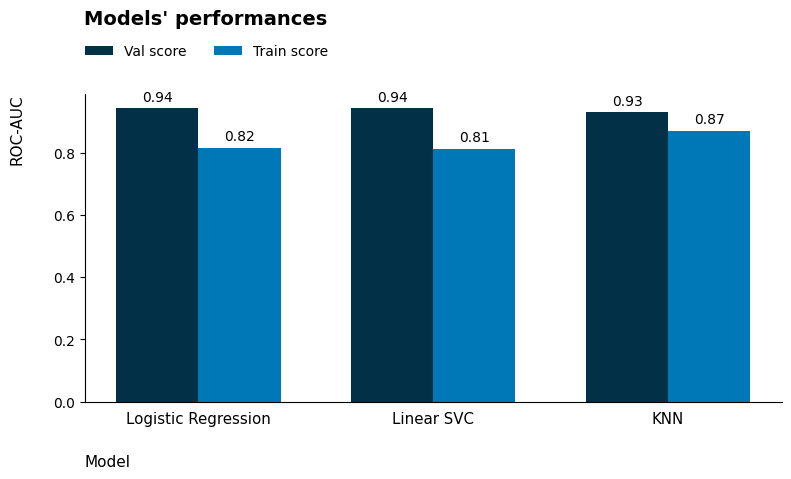

In [21]:
# K-fold cross validation for linear models.
eval_df = classification_kfold_cv(models=linear_models, 
                                  X_train=X_train_prepared_linear, 
                                  y_train=y_train, 
                                  n_folds=5)

plot_classification_kfold_cv(eval_df, bar_width=0.35, figsize=(9, 4), title_size=14, legend_x=0.175, legend_y=1.2, title_pad=50)

eval_df

Decision Tree results: 
--------------------------------------------------
Training score: 1.0
Average validation score: 0.8747054528095897
Standard deviation: 0.012801566737940409
Training time: 0.17646 seconds

Random Forest results: 
--------------------------------------------------
Training score: 1.0
Average validation score: 0.9870823100149068
Standard deviation: 0.0030555781676303547
Training time: 1.73162 seconds



,model,avg_val_score,train_score
0,Random Forest,0.987082,1.0
1,Decision Tree,0.874705,1.0


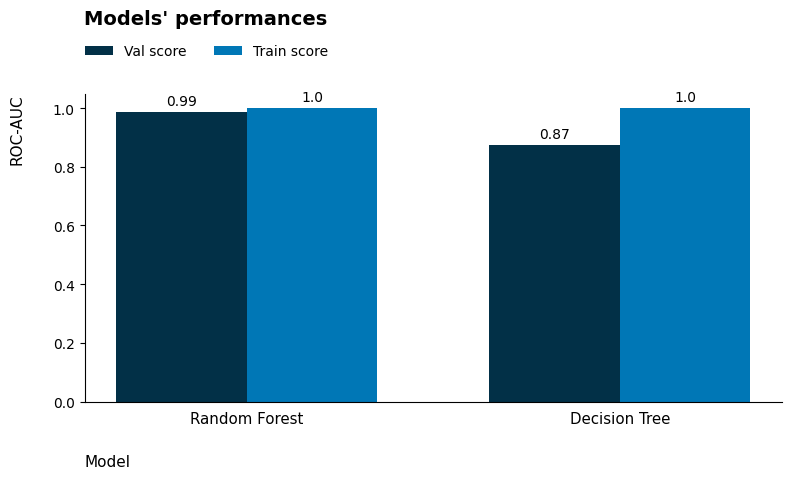

In [22]:
# K-fold cross validation for linear models.
eval_df = classification_kfold_cv(models=tree_models, 
                                  X_train=X_train_prepared_tree, 
                                  y_train=y_train, 
                                  n_folds=5)

plot_classification_kfold_cv(eval_df, bar_width=0.35, figsize=(9, 4), title_size=14, legend_x=0.175, legend_y=1.2, title_pad=50)

eval_df

## Feature Selection

The feature selection step is crucial for improving the model's generalization ability and making it less complex, thus reducing computational costs. 

- This step is crucial for improving the model's generalization ability and making it less complex, thus reducing computational costs. 
- I will use the Recursive Feature Elimination (RFE) method for feature selection.
- Recursive Feature Elimination (RFE) is a feature selection method that systematically removes irrelevant or less important features from a predictive model.

In [23]:
# Recursively select the features with highest feature importances until the final desired number of features is obtained.
rfe = RecursiveFeatureEliminator(n_folds=5, 
                                 scoring='roc_auc',
                                 estimator=RandomForestClassifier())
rfe.fit(X_train_prepared_tree, y_train)
X_train_selected = rfe.transform(X_train_prepared_tree)
X_train_selected.shape

(8101, 26)

In [24]:
# Visualize the final selected features.
X_train_selected.head()

,customer_age,months_on_book,total_relationship_count,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,...,proportion_inactive_months,products_per_tenure,trans_ct_per_contacts,products_per_inactivity,trans_ct_per_inactivity,trans_amt_per_credit_limit,age_per_tenure,trans_ct_per_tenure,trans_amt_per_tenure,total_spending
0,36.0,24.0,4.0,2570.0,2230.0,0.686,1755.0,42.0,0.448,0.868,...,0.125000,0.166667,21.000000,1.333333,14.000000,0.682879,1.500000,1.750000,73.125000,3985.0
1,44.0,36.0,5.0,25276.0,0.0,0.849,2282.0,38.0,0.583,0.000,...,0.055556,0.138889,12.666667,2.500000,19.000000,0.090283,1.222222,1.055556,63.388889,2282.0
2,46.0,30.0,6.0,11670.0,915.0,0.892,4277.0,89.0,0.854,0.078,...,0.100000,0.200000,89.000000,2.000000,29.666666,0.366495,1.533333,2.966667,142.566666,5192.0
3,36.0,24.0,3.0,3124.0,1593.0,0.869,1652.0,41.0,0.367,0.510,...,0.041667,0.125000,13.666667,3.000000,41.000000,0.528809,1.500000,1.708333,68.833336,3245.0
4,50.0,40.0,4.0,34516.0,1185.0,0.725,3874.0,72.0,0.714,0.034,...,0.050000,0.100000,24.000000,2.000000,36.000000,0.112238,1.250000,1.800000,96.849998,5059.0


In [25]:
X_train_selected.columns.tolist()

['customer_age',
 'months_on_book',
 'total_relationship_count',
 'credit_limit',
 'total_revolving_bal',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio',
 'trans_amt_per_dependent',
 'trans_ct_per_dependent',
 'trans_amt_per_products',
 'trans_ct_per_products',
 'avg_trans_amt',
 'credit_util_rate',
 'proportion_inactive_months',
 'products_per_tenure',
 'trans_ct_per_contacts',
 'products_per_inactivity',
 'trans_ct_per_inactivity',
 'trans_amt_per_credit_limit',
 'age_per_tenure',
 'trans_ct_per_tenure',
 'trans_amt_per_tenure',
 'total_spending']

- As we can see, features that showed a clear discrimination between churners and non-churners were maintained, such as total_trans_ct and total_trans_amt. 
- Moreover, a lot of features created from the feature engineering were also maintained, demonstrating the importance of this task for model's performance.

## Hyperparameter Tuning

In [26]:
# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 16),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 16),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced'
    }

    # Train the Random Forest model with the sampled hyperparameters
    model = RandomForestClassifier(**params)

    # Obtain average stratified k-fold cross-validation roc-auc score
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = cross_val_score(model, X_train_selected, y_train, scoring='roc_auc', cv=stratified_kfold)
    avg_roc_auc = val_scores.mean()

    return avg_roc_auc

In [27]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')

[I 2024-06-25 11:42:35,742] A new study created in memory with name: no-name-9d64a81e-3bda-4545-816e-b94bfed55f55


In [28]:
# Optimize the objective function
study.optimize(objective, n_trials=10)

[I 2024-06-25 11:42:49,088] Trial 0 finished with value: 0.9784340795906372 and parameters: {'n_estimators': 240, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.9784340795906372.
[I 2024-06-25 11:45:37,842] Trial 1 finished with value: 0.9748558095547752 and parameters: {'n_estimators': 964, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.9784340795906372.
[I 2024-06-25 11:45:49,250] Trial 2 finished with value: 0.8691738633468382 and parameters: {'n_estimators': 104, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.9784340795906372.
[I 2024-06-25 11:46:25,282] Trial 3 finished with value: 0.9790238813904656 and parameters: {'n_estimators': 916, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': '

In [29]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 441, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}


# 7.Final production model testing and evaluation

- In this step, I intend to evaluate our final tuned model on test data (simulating production unseen data).
- Once I am facing a binary classification problem with an imbalanced target, it is important to look at metrics such as ROC-AUC. I want my model to discriminate well between churners and non-churners.
- Once the project objective is to order the customers by the churn probability, it is not necessary to calibrate the probabilities. The outputs of the model satisfy our goal.
- After evaluating the model, I will interpret its results.

In [30]:
best_params = {
                'n_estimators': 229,
                'max_depth': 28,
                'min_samples_split': 2,
                'min_samples_leaf': 1,
                'max_features': 'log2',
                'bootstrap': True
            }

In [31]:
rf_clf = RandomForestClassifier(**best_params)

In [32]:
rf_clf.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=28, max_features='log2', n_estimators=229)

In [33]:
X_test_prepared = tree_preprocessor.transform(X_test)
X_test_selected = rfe.transform(X_test_prepared)
X_test_selected.shape

(2026, 26)

In [34]:
y_pred = rf_clf.predict(X_test_selected)

Get the model's estimated probabilities of churn.

In [35]:
churn_probas = rf_clf.predict_proba(X_test_selected)[:, 1]

## Evaluate the final tuned Random Forest model

In [36]:
def evaluate_classifier(y_true, y_pred, probas):
    '''
    Evaluate the performance of a binary classifier and visualize the results.

    This function calculates and displays various evaluation metrics for a binary classifier,
    including the classification report, confusion matrix, ROC curve and AUC, PR curve and AUC,
    brier score, gini and ks.

    Args:
    - y_true (pd.series): True binary labels.
    - y_pred (pd.series): Predicted binary labels.
    - probas (pd.series): Predicted probabilities of positive class.

    Returns:
    - model_metrics (pd.DataFrame): A dataframe containing the classification metrics for the passed set.

    Raises:
    - CustomException: If an error occurs during evaluation.
    '''

    try:
        # Print classification report and calculate its metrics to include in the final metrics df.
        print(classification_report(y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        # Calculate and print brier score, gini and ks.
        brier_score = brier_score_loss(y_true, probas)
        print(f'Brier Score: {round(brier_score, 2)}')
        
        fpr, tpr, thresholds = roc_curve(y_true, probas)
        roc_auc = roc_auc_score(y_true, probas)
        gini = 2 * roc_auc - 1
        print(f'Gini: {round(gini, 2)}')
        
        scores = pd.DataFrame()
        scores['actual'] = y_true.reset_index(drop=True)
        scores['churn_probability'] = probas
        sorted_scores = scores.sort_values(by=['churn_probability'], ascending=False)
        sorted_scores['cum_negative'] = (1 - sorted_scores['actual']).cumsum() / (1 - sorted_scores['actual']).sum()
        sorted_scores['cum_positive'] = sorted_scores['actual'].cumsum() / sorted_scores['actual'].sum()
        sorted_scores['ks'] = np.abs(sorted_scores['cum_positive'] - sorted_scores['cum_negative'])
        ks = sorted_scores['ks'].max()
        
        print(f'KS: {round(ks, 2)}')
        
        # Confusion matrix.
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot = True, fmt = 'd')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Values')
        plt.ylabel('Real Values')
        plt.show()
        
        # Plot ROC Curve and ROC-AUC.
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='#023047')
        ax.plot([0, 1], [0, 1], linestyle='--', color='#e85d04')  # Random guessing line.
        ax.set_xlabel('False Positive Rate', fontsize=10.8, labelpad=20, loc='left')
        ax.set_ylabel('True Positive Rate', fontsize=10.8, labelpad=20, loc='top')
        ax.set_xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax.set_yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax.set_title('Receiver operating characteristic (ROC) curve', fontweight='bold', fontsize=12, pad=20, loc='left')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend()
    
        # PR AUC Curve and score.

        # Calculate model precision-recall curve.
        p, r, _ = precision_recall_curve(y_true, probas)
        pr_auc = auc(r, p)
        
        # Plot the model precision-recall curve.
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.plot(r, p, marker='.', label=f'PR AUC = {pr_auc:.2f}', color='#023047')
        ax.set_xlabel('Recall', fontsize=10.8, labelpad=20, loc='left')
        ax.set_ylabel('Precision', fontsize=10.8, labelpad=20, loc='top')
        ax.set_xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax.set_yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax.set_title('Precision-recall (PR) curve', fontweight='bold', fontsize=12, pad=20, loc='left')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend()

        # Construct a DataFrame with metrics for passed sets.
        model_metrics = pd.DataFrame({
                                    'Metric': ['Accuracy',
                                               'Precision',
                                               'Recall',
                                               'F1-Score',
                                               'ROC-AUC',
                                               'KS',
                                               'Gini',
                                               'PR-AUC',
                                               'Brier'],
                                    'Value': [accuracy, 
                                              precision, 
                                              recall,
                                              f1,
                                              roc_auc,
                                              ks,
                                              gini, 
                                              pr_auc,
                                              brier_score,
                                              ],
                                    })
        
        return model_metrics

    except Exception as e:
        raise CustomException(e, sys)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.82      0.87       325

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Brier Score: 0.03
Gini: 0.97
KS: 0.88


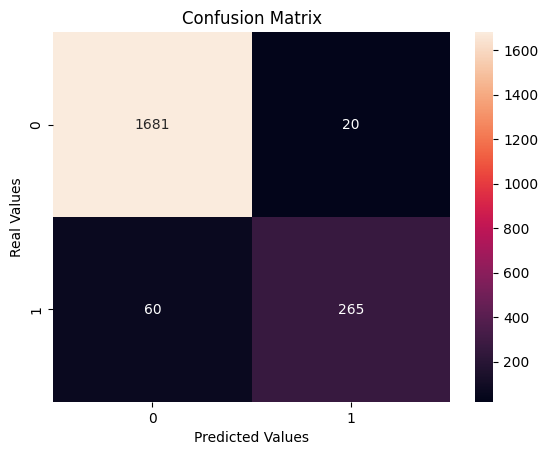

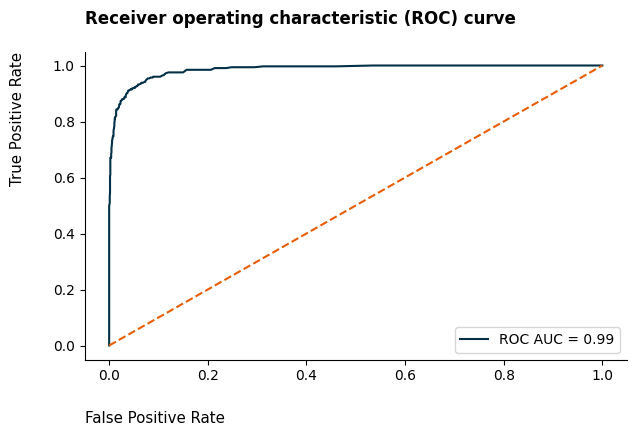

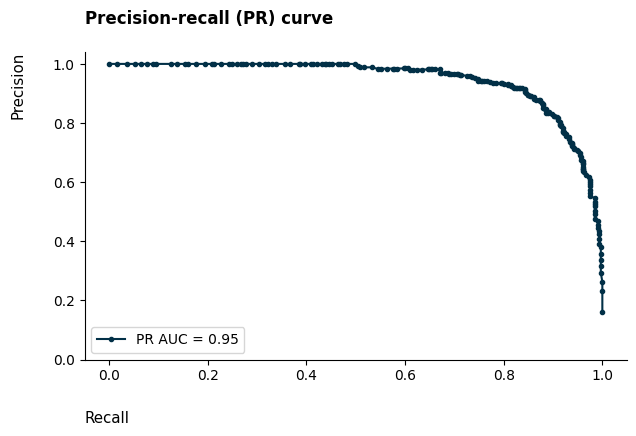

In [37]:
model_metrics = evaluate_classifier(y_test, y_pred, churn_probas)

In [38]:
model_metrics

,Metric,Value
0,Accuracy,0.960513
1,Precision,0.929825
2,Recall,0.815385
3,F1-Score,0.868852
4,ROC-AUC,0.985562
5,KS,0.877421
6,Gini,0.971125
7,PR-AUC,0.946602
8,Brier,0.033772


The model results are excellent!

**Recall (0.80):** The model correctly identifies 80% of the churners. In practical terms, looking at the confusion matrix, it has accurately predicted 262 out of 325 attrited customers.

**Precision (0.93):** Out of all customers predicted as churn, 93% of them are actually churners. In practical terms, considering the confusion matrix, out of 324 customers predicted as churn, 262 of them are indeed churners.

**ROC-AUC (0.99):** With a ROC-AUC score of 0.99, the model demonstrates outstanding ability to differentiate between attrited and existing customers. In practive, if we randomly choose a customer that churned and a customer that dind't churn, in 99% of the time the model will estimate a higher probability of churn for that customer who actually attrited.

- This outstanding performance is not because data leakage, once all the features included are present at the moment of prediction and the split was made before everything. It is due to the quality of the data, the independent variables clearly separate churners and non-churners.
- Finally, once the train, test and validation scores are similar, the model's generalization ability is reliable.
- Analyze the predicted probabilities distribution by churn.

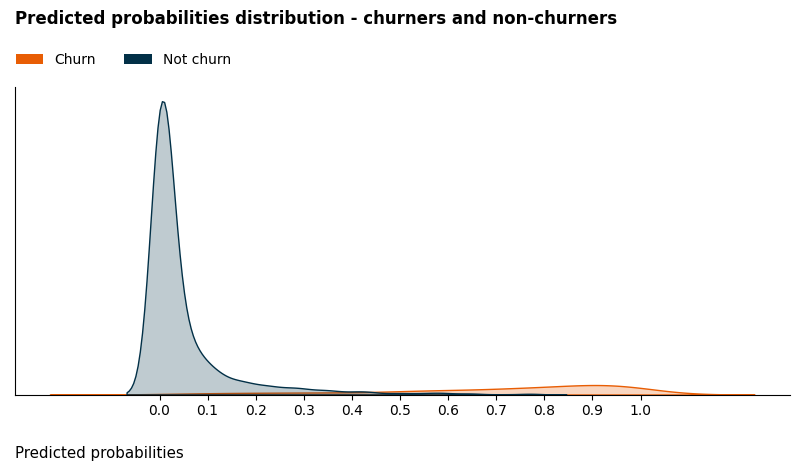

In [39]:
plot_probability_distributions(y_test, churn_probas)

It is possible to see that there is a clear separation between the distributions of the predicted probabilities for churners and non-churners. Great!

In [40]:
def probability_scores_ordering(y_true, probas):
    '''
    Order and visualize the probability scores in deciles based on predicted probabilities and true labels.

    Parameters:
    - y_true (pd.Series): Actual target values for the set. 1 is churner and 0 is non-churner.
    - probas (pd.Series): Predicted probabilities of churning for the passed set.

    Returns:
    - None: Plots the probability scores ordering.

    Raises:
    - CustomException: An exception is raised if an error occurs during the execution.
    
    Example:
    ```python
    probability_scores_ordering(y_test, probas)
    ```
    '''
    try:
        # Add some noise to the predicted probabilities and round them to avoid duplicate problems in bin limits.
        noise = np.random.uniform(0, 0.0001, size=probas.shape)
        probas += noise
        #probas = round(probas, 10)
        
        # Create a DataFrame with the predicted probabilities of churning and actual values.
        probas_actual_df = pd.DataFrame({'probabilities': probas, 'actual': y_true.reset_index(drop=True)})
        
        # Sort the probas_actual_df by probabilities.
        probas_actual_df = probas_actual_df.sort_values(by='probabilities', ascending=True)
        
        # Calculate the deciles.
        probas_actual_df['deciles'] = pd.qcut(probas_actual_df['probabilities'], q=10, labels=False, duplicates='drop')
        
        # Calculate the churn rate per decile.
        decile_df = probas_actual_df.groupby(['deciles'])['actual'].mean().reset_index().rename(columns={'actual': 'churn_rate'})
        
        # Plot probability scores ordering.
        # Plot bar graph of deciles vs event rate.
        fig, ax = plt.subplots(figsize=(12, 3))
        
        bars = ax.bar(decile_df['deciles'], decile_df['churn_rate'], color='#023047')
        
        ax.set_title('Probability scores ordering - Churn rate per decile', loc='left', fontweight='bold', fontsize=14)
        ax.set_xticks(range(10), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
        ax.tick_params(axis=u'both', which=u'both',length=0)
        ax.set_xlabel('Decil', labelpad=25, loc='center')
        ax.yaxis.set_visible(False)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.grid(False)
        
        # Annotate churn rate inside each bar with increased font size
        for bar, absent_rate in zip(bars, decile_df['churn_rate']):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.08, f'{absent_rate*100:.1f}%', 
                    ha='center', va='top', color='black', fontsize=10.4)

        plt.show() 
    except Exception as e:
        raise CustomException(e, sys)

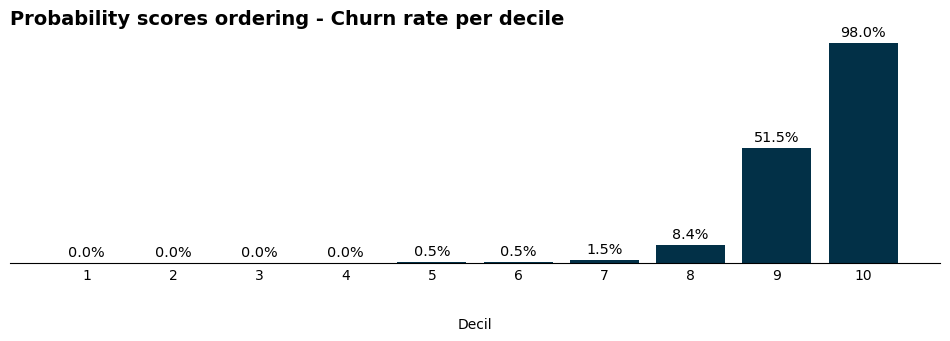

In [41]:
probability_scores_ordering(y_test, churn_probas)

- The churn rate per decile helps in understanding how well the model's predicted probabilities align with actual outcomes.
  
- If the model is well-calibrated and accurate, higher deciles (where predicted probabilities are higher) should have higher churn rates, indicating that customers in those deciles are more likely to churn.

In [42]:
# Initialize the SHAP explainer with the final model.
explainer = shap.Explainer(rf_clf)

# Compute shap values.
shap_values = explainer(X_test_selected)

In [43]:
# Assess the shape.
np.shape(shap_values.values)

(2026, 26, 2)

### Interpret the model results with SHAP values

## Financial Results

In [44]:
financial_results = pd.concat([X_test, y_test], axis=1)[['total_revolving_bal', 'churn_flag']]
financial_results['predicted'] = y_pred

In [45]:
fp_data = financial_results.loc[(financial_results['churn_flag'] == 0) & (financial_results['predicted'] == 1)]
fn_data = financial_results.loc[(financial_results['churn_flag'] == 1) & (financial_results['predicted'] == 0)]
tp_data = financial_results.loc[(financial_results['churn_flag'] == 1) & (financial_results['predicted'] == 1)]

In [46]:

fp_data['fp_cost'] = fp_data['total_revolving_bal']*1.18 - fp_data['total_revolving_bal']*1.10
fn_data['fn_cost'] = fn_data['total_revolving_bal']*1.18
tp_data['tp_gain'] = tp_data['total_revolving_bal']*1.10

In [47]:
financial_gain = tp_data['tp_gain'].sum() - fp_data['fp_cost'].sum() - fn_data['total_revolving_bal'].sum()
print(f'The model provides a financial gain of: ${financial_gain:,.2f}')

The model provides a financial gain of: $91,967.98
